# Ćwiczenia 7. Aproksymacja nieliniowa i optymalizacja

***Zadanie 1.***

Przygotouj dane pomiarowe znajdujące się w pliku `Raba2015.txt` lub w pliku `Raba2015.txt lepsza wersja` (format zapisu przystosowany do Pythona):
* Dostosuj format danych i umieść je w tablicy NumPy.
* Dane pochodzą z pomiarów przepływu wody ($m^3/s$) w rzece Rabie przeprowadzonych w miejscowości Stróża. Pomiary trwały 68 godzin (od godziny 10:00, 17 listopada 2015 r. do godziny 6:00, 20 listopada 2015 r.).
* Zaprezentuj dane na wykresie.
* Przeprowadź aproskymację przebiegu fali powodziowej za pomocą wielomianu. Wykorzystaj metodę `scipy.optimize.curve_fit`.

In [38]:
import numpy as np
q = [2.4000 ,   2.5600 ,   2.5600 ,   2.5600  ,  2.7200 ,   2.8800 ,
    3.2000 ,   4.0400 ,   5.5600 ,   6.2000  ,  9.3000 ,  14.7000 ,
    18.2000,   21.8000,   27.8000,   30.2000 ,  31.4000,   30.2000,
    29.0000,   27.8000,   25.4000,   24.2000 ,  23.0000,   21.8000,
    21.8000,   20.6000,   19.4000,   19.4000 ,  18.2000,   17.0000,
    17.0000,   15.9000,   14.7000,   14.7000 ,  13.5000,   13.5000,
    12.3000,   12.3000,   11.1000,   11.1000 ,  10.5000,   10.5000,
    10.5000,    9.9000,    9.9000,    9.9000 ,   9.3000,    9.3000,
    9.3000 ,   8.7000 ,   8.7000 ,   8.7000  ,  8.7000 ,   8.7000 ,
    8.1000 ,   8.1000 ,   8.1000 ,   8.1000  ,  7.3400 ,   6.9600 ,
    6.9600 ,   6.9600 ,   6.9600 ,   6.9600  ,  6.5800 ,   7.3400 ,
    6.9600 ,   6.9600 ,   6.9600]
q = np.array(q)

In [39]:
h = np.arange(len(q))
print(h)

data = np.empty((len(q), 2))
data[:,0] = h
data[:,1] = q
print(data)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
[[ 0.    2.4 ]
 [ 1.    2.56]
 [ 2.    2.56]
 [ 3.    2.56]
 [ 4.    2.72]
 [ 5.    2.88]
 [ 6.    3.2 ]
 [ 7.    4.04]
 [ 8.    5.56]
 [ 9.    6.2 ]
 [10.    9.3 ]
 [11.   14.7 ]
 [12.   18.2 ]
 [13.   21.8 ]
 [14.   27.8 ]
 [15.   30.2 ]
 [16.   31.4 ]
 [17.   30.2 ]
 [18.   29.  ]
 [19.   27.8 ]
 [20.   25.4 ]
 [21.   24.2 ]
 [22.   23.  ]
 [23.   21.8 ]
 [24.   21.8 ]
 [25.   20.6 ]
 [26.   19.4 ]
 [27.   19.4 ]
 [28.   18.2 ]
 [29.   17.  ]
 [30.   17.  ]
 [31.   15.9 ]
 [32.   14.7 ]
 [33.   14.7 ]
 [34.   13.5 ]
 [35.   13.5 ]
 [36.   12.3 ]
 [37.   12.3 ]
 [38.   11.1 ]
 [39.   11.1 ]
 [40.   10.5 ]
 [41.   10.5 ]
 [42.   10.5 ]
 [43.    9.9 ]
 [44.    9.9 ]
 [45.    9.9 ]
 [46.    9.3 ]
 [47.    9.3 ]
 [48.    9.3 ]
 [49.    8.7 ]
 [50.    8.7 ]
 [51.    8.7 ]
 [52.    

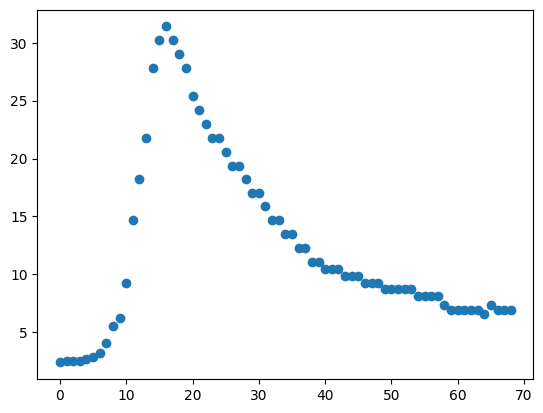

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(h, q)
plt.show()

In [19]:
import scipy
import scipy.optimize

def f4(x, a, b, c, d, e): return a*x**4 + b*x**3 + c*x**2 + d*x + e 

args, _ = scipy.optimize.curve_fit(f4, h, q)

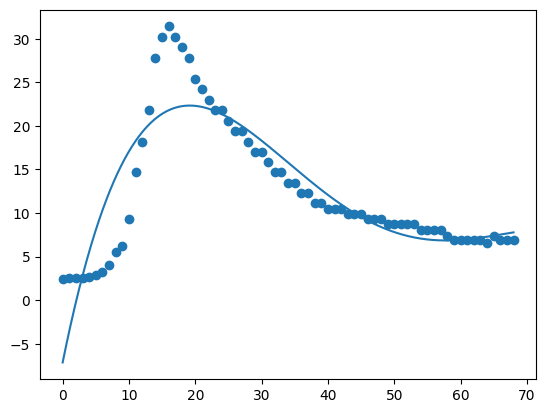

In [20]:
X = np.linspace(0, 68, 1000)

plt.figure()
plt.scatter(h, q)
plt.plot(X, f4(X, *args))
plt.show()

***Zadanie 2. Nieliniowa aproksymacja tempa opadu fali powodziowej***

1. Przyjmijmy następujący wskaźnik jakość aproksymacji: $\sum_{i=0}^{n}(F(x_i)-y_i)^2$. Chcemy przeprowadzić aproksymacje fragmentu zbioru danych, który reprezentuje spadek przepływu. 
2. Obliczyć wartości parametrów funkcji aproksymującej postaci $f(x) = ce^{−\lambda x}$ za pomocą funkcji `scipy.optimize.minimize`, przetestuj różne solvery.
3. Wykreśl dane oraz funkcję aproksymującą.
4. Oceń jakość aproksymacji.
5. Powyższy eksperyment należy powtórzyć z funkcją aproksymującą o większej liczbie parametrów.
6. Zaproponuj inną funkcji aproksymującej z liniowymi lub nieliniowymi parametrami i przeprowadź aproksymację fali powodziowej.

c, lam:  51.90428783394569 0.036153852957432675


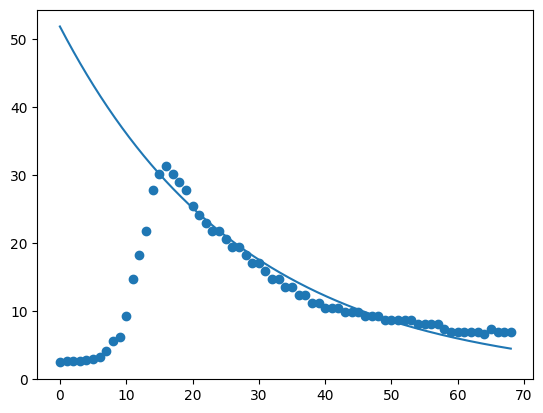

In [56]:
def g(x, c, lam):
    return c*np.exp(-lam*x)

def min_func(params):
    c, lam = params
    X = np.arange(16, 69)
    return np.sum((g(X, c, lam)-q[16:])**2)


res = scipy.optimize.minimize(min_func, [1, 0.01])
c, lam = res.x
print('c, lam: ', c, lam)

X = np.linspace(0, 68, 1000)

plt.figure()
plt.scatter(h, q)
plt.plot(X, g(X, c, lam))
plt.show()

***Zadanie 3. Aproksymacja przebiegu w całej dziedzinie pomiaru***


Aproksymacja przepływu w całym zakresie pomiarów:
* Próba z wielomianami wykładniczymi. Czy zwiększanie liczby składników prowadzi do poprawy aproksymacji?
* Algorytm dla aproksymacji funkcjami sklejanymi.

c, lam:  9.583493362746804 -0.047212190511906726


C:\Users\marci\AppData\Local\Temp\ipykernel_15808\2352744687.py:2: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-lam*x)
C:\Users\marci\AppData\Local\Temp\ipykernel_15808\2352744687.py:7: RuntimeWarning: overflow encountered in square
  return np.sum((g(X[low:up], c, lam)-q[low:up])**2)
c:\Users\marci\Desktop\repo\MN\venv\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\marci\AppData\Local\Temp\ipykernel_15808\2352744687.py:2: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-lam*x)
C:\Users\marci\AppData\Local\Temp\ipykernel_15808\2352744687.py:7: RuntimeWarning: overflow encountered in square
  return np.sum((g(X[low:up], c, lam)-q[low:up])**2)


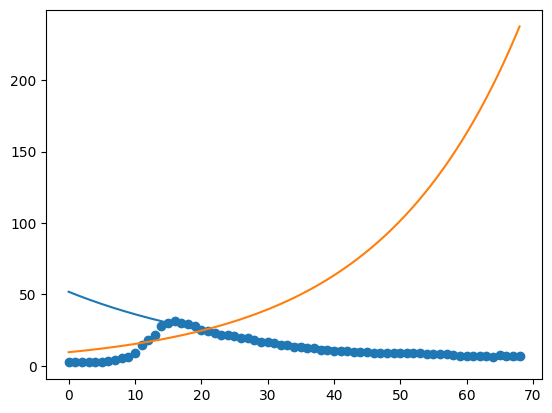

In [100]:
def g(x, c, lam):
    return c*np.exp(-lam*x)

def min_func(params, low, up):
    c, lam = params
    X = np.arange(69)
    return np.sum((g(X[low:up], c, lam)-q[low:up])**2)

X = np.linspace(0, 68, 1000)

plt.figure()
plt.scatter(h, q)

res = scipy.optimize.minimize(min_func, [10, -0.001], args=(16, 69))
c, lam = res.x
plt.plot(X, g(X, c, lam))

res = scipy.optimize.minimize(min_func, [-5, 0.1], args=(0, 16))
c, lam = res.x
print('c, lam: ', c, lam)
plt.plot(X, g(X, c, lam))

plt.show()